{{< pagebreak >}}

## Least squares is MLE

Show that in the case of linear model with Gaussian errors, maximum likelihood and least squares are the same thing, and $C_p$ and AIC are equivalent.

#### Solution

To prove the above statement, we separate the proof into two pieces. First, we will show that maximum likelihood and least squares result in the same $\beta$ coefficient under linear models with Gaussian errors. Then we will show the equivlanece of $C_p$ and AIC.

**Part I:**

We want to show that
$$ \hat{\beta}_{ML} = \underset{\beta \in \mathbb{R}^{p+1}}{\operatorname{arg \ max}} \enspace \mathcal{L}(\beta) = (X'X)^{-1}X'Y = \hat{\beta}_{OLS}$$
Under linear models, we assume Linearity such that
$$\mathbb{E}[Y | X_1 = x_1 , \dots, X_p = x_p] = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$$
Normal (Gaussian) errors imply that $\varepsilon \sim N(0,\sigma^2)$. Hence, for a sample $\{(x_i, y_i) \}^n_{i=1}$, we say $Y|X \sim N(X'\beta, \sigma^2 I)$ where $I_{n\times n}$ is the Identity matrix. Since $Y_1 , \dots, Y_n$ is i.i.d., we obtain the likelihood function
$$ \mathcal{L} = \prod^n_{i=1} \phi (Y_i ; (X'\beta)_i, \sigma^2 I) = \prod^n_{i=1} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{-(Y_i -X'\beta)^2}{2 \sigma^2}} $$
We can re-write this the likelihood function in matrix form as
$$ \mathcal{L} = \left ( \frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \exp \left(\frac{-(Y-X\beta)'(Y-X\beta)}{2 \sigma^2}\right)$$
Where $Y_{n \times 1}$ and $X_{n \times p}$. We can then take the logarithm of both sides to get the log-likelihood function:
\begin{align*}
\ln (\mathcal{L}) &= - \frac{n}{2} \ln(2 \pi) - \frac {n}{2} \ln(\sigma^2) - \frac{1}{2 \sigma^2} (Y-X\beta)'(Y-X\beta) \\
&= - \frac{n}{2} \ln(2 \pi) - \frac{n}{2} \ln(\sigma^2) - \frac{1}{2 \sigma^2} (Y'Y - 2\beta X'Y + \beta'X'X\beta)
\end{align*}
Since the transpose of a scalar is the scalar $Y'X\beta = (Y'X\beta)' = \beta'X'Y$. We now take the partial derivative with respect to $\beta$:
\begin{align*}
\frac{\partial \ln (\mathcal{L})}{\partial \beta} &= - \frac{1}{2 \sigma^2} \left ( \frac{\partial [Y'Y - 2\beta X'Y + \beta'X'X\beta]}{\partial \beta} \right) = 0 \\
&= - \frac{1}{2 \sigma^2} (-2X'Y + 2X'X\beta) = \frac{1}{\sigma^2} (X'Y - X'X\beta) = 0
\end{align*}
This then implies that
$$\hat{\beta}_{ML} = (X'X)^{-1}X'Y = \hat{\beta}_{OLS}$$

**Part II:**

We now want to show the equivalence between $C_p$ and AIC under the same assumptions as in Part (I). We know from lecture that
$$C_p = \frac{1}{n} (\text{RSS} + 2d \hat{\sigma}^2)$$
And
$$\text{AIC} = -  2 \ln \mathcal{L} + 2d$$
where $d$ is the total number of parameters used and $\hat{\sigma}^2$ is an estimate of the error variance $\text{Var}(\varepsilon)$. Hence, we substitute in our expression for $\mathcal{L}$ from Part (I):
\begin{align*}
\text{AIC} &= -  2 \ln \mathcal{L} + 2d \\
&= -2 \left( - \frac{n}{2} \ln(2 \pi) - \frac{n}{2} \ln(\sigma^2) - \frac{(Y - \hat{Y})'(Y - \hat{Y})}{2 \sigma^2} \right) + 2d \\
&= n \ln (2\pi \sigma^2) + \frac{(Y - \hat{Y})'(Y - \hat{Y})}{\sigma^2} + 2d \\
&= n \ln (2\pi \sigma^2) + \frac{\text{RSS}}{\sigma^2} + 2d \\
&= n \ln (2\pi \sigma^2) + \frac{n}{\sigma^2} C_p
\end{align*}
Notice, that AIC only differs by $C_p$ by constant scalars $n$ and $\sigma$. Therefore, both metrics will coincide in terms of model selection. Hence, we show that the $C_p$ and AIC are equivalent in this sense.

## ISL Exercise 6.6.1 (10pts)

We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain $p + 1$
models, containing $0,1,2,\dots,p$ predictors. Explain your answers:

### Part (a)

Which of the three models with $k$ predictors has the smallest
training RSS?

#### Solution

Best subset selection will be the model with the smallest training RSS. This is due to the fact that the other 2 approaches conduct model selection dependent upon their starting predictor. In the sense that, if forward/backward selection chooses a different starting variable, the final model may be different. Hence, the RSS will be smallest for Best subset which runs through ever possible combination of model features.

### Part (b)

Which of the three models with $k$ predictors has the smallest
test RSS?

#### Solution

Best subset selection will likely be the model also with the smallest testing RSS. Once again, it is due to the construction of best subset where it will consider a much greater selection of models. In fact, it considers all combinations of model features. Hence, it is likely that it will have a smaller test RSS than either forward/backward stepwise selection.

### Part (c) True or False:

1. The predictors in the $k$-variable model identified by forward
stepwise are a subset of the predictors in the $(k+1)$ variable
model identified by forward stepwise selection.

This is **True**. This is literally how forward stepwise selection works. It has a base model (with 1 feature) and then it iteratively adds features and drops those that become statistically insignificant. hence, the $k$ feature model will be a subset of the $k+1$ feature model.

2. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$
variable model identified by backward stepwise selection.

This is **True**. Once again the model with $k$ features is just the model with $k+1$ features except we have removed a variable. Hence, it is a subset.

3.  The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$
variable model identified by forward stepwise selection.

This is **False**. Forward and Backward selection are not linked in this kind of way. They are also somewhat opposite processes, so the features in the $k$ variable model of one method is not guaranteed to be a subset of the $k+1$ feature model of the other method.

4. The predictors in the $k$-variable model identified by forward
stepwise are a subset of the predictors in the $(k+1)$ variable
model identified by backward stepwise selection.

This is **False** for the same reason. Forward and Backward selection are not linked in this kind of way. They are also somewhat opposite processes, so the features in the $k$ variable model of one method is not guaranteed to be a subset of the $k+1$ feature model of the other method.

5.  The predictors in the $k$-variable model identified by best
subset are a subset of the predictors in the $(k + 1)$ variable
model identified by best subset selection.

This is **False**. This is not necessarily true because best subset tests every combination of features from the available set of features. By increasing the set of features by 1, it is possible that best subset selection will arrive at a combination of features that were not all simultaneously chosen by the $k$ case.

## ISL Exercise 6.6.3 (10pts)

Suppose we estimate the regression coefficients in a linear regression
model by minimizing

$$\sum_{i=1}^n\Biggl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\Biggr)\text{ subject to }\sum_{j=1}^p|\beta_j|\le s$$

for a particular value of $s$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

### Part (a)

As we increase $s$ from 0. the training RSS will:

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in a
U shape

iii. Steadily increase

iv. Steadily decrease

v. Remain constant.

#### Solution

**iv.** is correct. The training RSS will steadily decrease as we increase $s$ from 0. As we increas $s$ we are weakening our restriction on what our $\beta$ coefficients can be; therefore, the model is becoming more flexible which causes a steady decrease in training RSS.

### Part (b)

Repeat (a) for test RSS.

#### Solution

**ii.** is correct. We call on the same idea as before. As we weaken the restriction, the coefficients are allowed to increase to their least squares estimates. This is what causes the testing RSS to initially decrease before increasing once again when the coefficients start overfitting and the variance increases.

### Part (c)

Repeat (a) for variance.

#### Solution

**iii.** is correct. As hinted to in the previous part, when $s=0$ the coefficients will have no variance. As the restriction is loosened, the model coefficients begin to increase and the coefficients become increasingly fitted to the training data. Hence, the variance will increase.

### Part (d)

Repeat (a) for (squared) bias.

#### Solution

**iv.** is correct. We call on the classic bias-variance trade-off. As we loosen the restriction, we are imposing less and less shrinkage; hence, the bias decreases monotonically.

### Part (e)

Repeat (a) for the irreducible error.

#### Solution

**v.** is correct. By definition, the irreducible error is due to the underlying data rather than any choice of model or restriction. Hence, it will always stay constant regardless of whatever restrictions we impose.

## ISL Exercise 6.6.4 (10pts)

Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$\sum_{i=1}^n\Biggl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\Biggr) - \lambda\sum_{j=1}^p\beta_j^2$$

for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

### Part (a)

As we increase $\lambda$ from 0. the training RSS will:

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in a
U shape

iii. Steadily increase

iv. Steadily decrease

v. Remain constant.

#### Solution

**iii.** is correct. The training RSS will steadily increase as we increase $\lambda$ from 0. As we increas $\lambda$ we are strenghtening our restriction on what our $\beta$ coefficients can be; therefore, the model is becoming less flexible which causes a steady increase in training RSS.

### Part (b)

Repeat (a) for test RSS.

#### Solution

**ii.** is correct. We call on the same idea as before. As we strenghten the restriction, the coefficients are allowed to deviate further and further from their Least Squares estimates. Hence, as we increase $\lambda$, the coefficients start being reduced further and further to zero and the overfitting is reduced. Thus, test RSS initially decreases but then when all coefficients are approaching 0, the model is clearly not correct and we expect test RSS to increase.

### Part (c)

Repeat (a) for variance.

#### Solution

**iv.** is correct. As hinted to in the previous part, as $\lambda \to \infty$ the coefficients will all be shrunken to 0 and hence have no variance. Thus, as $\lambda$ increases, we expect variance to monotonically decrease.

### Part (d)

Repeat (a) for (squared) bias.

#### Solution

**iii.** is correct. We call on the classic bias-variance trade-off. As we strengthen the restriction, we are imposing more and more shrinkage; hence, the bias increases monotonically.

### Part (e)

Repeat (a) for the irreducible error.

#### Solution

**v.** is correct. By definition, the irreducible error is due to the underlying data rather than any choice of model or restriction. Hence, it will always stay constant regardless of whatever restrictions we impose.

## ISL Exercise 6.6.5 (10pts)

It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give different coefficient values to correlated variables. We will now explore this property in a very simple setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}, x_{21} = x_{12}$. Furthermore, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_0 = 0$.

### Part (a)

Write out the ridge regression optimization problem in this setting.

#### Solution

Recall that Ridge Regression seeks to find the coefficients that minimize
$$\sum_{i=1}^n\Biggl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\Biggr) - \lambda\sum_{j=1}^p\beta_j^2$$
Hence, with the given information, we want to minimize:
$$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + \lambda(\hat{\beta}_1^2 + \hat{\beta}_2^2)$$

### Part (b)

Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

#### Solution

We accomplish this by taking the partial derivative with respect to both $\hat{\beta}_1$ and $\hat{\beta}_2$. Hence, we have
$$\frac{\partial(\cdot)}{\partial \hat{\beta}_1} = -2x_1 (y - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1) - 2x_2 (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2) + 2 \lambda \hat{\beta}_1 = 0$$
Which then implies that
$$\hat{\beta}_1 = \frac{x_1 (y - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1) + x_2 (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)}{\lambda}$$
If we then take the partial with respect to $\hat{\beta}_2$ we get
$$\frac{\partial(\cdot)}{\partial \hat{\beta}_2} = -2x_1 (y - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1) - 2x_2 (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2) + 2 \lambda \hat{\beta}_2 = 0$$
Which then can be re-written as
$$\hat{\beta}_2 = \frac{x_1 (y - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1) + x_2 (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)}{\lambda}$$
This can only be true if $\hat{\beta}_1 = \hat{\beta}_2$,

### Part (c)

Write out the lasso optimization problem in this setting.

#### Solution

Recall that Lasso seeks to find the coefficients that minimize
$$\sum_{i=1}^n\Biggl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\Biggr) - \lambda\sum_{j=1}^p |\beta_j |$$
Hence, with the given information, we want to minimize:
$$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|)$$

### Part (d)

Aruge that in this setting, the Lasso coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique -- in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

#### Solution

Our approach to arguing the lack of uniquness begins with us re-writing our Lasso minimization problem in the form in which it was presented in problem 3 (ISL 6.6.3)
$$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2$$
Subject to the constraint
$$ |\hat{\beta}_1| + |\hat{\beta}_2|\le s $$
Now, we know (from lecture) that the constraint in Lasso geometrically is a diamond at the origin of $\mathbb{R}^2$ euclidean plane ($\hat{\beta}_1 , \hat{\beta}_2$) with a distance from the axis equal to the constraint $s$. Beyond this, we can further simplify our expression since our problem parameters allow us to collapse several terms in order to get
$$2(y_1 - (\hat{\beta}_1 + x_1\hat{\beta}_2))^2\ge 0$$
Now we minimize this problem by taking the partial
$$\frac{\partial(\cdot)}{\partial (\hat{\beta}_1 + \hat{\beta}_2)} = -4x_1(y_1 - x_1 (\hat{\beta}_1 + \hat{\beta}_2)) = 0$$
Which then simply rearranges to show
$$\hat{\beta}_1 + \hat{\beta}_2 = \frac{y_1}{x_1}$$
This expression represents a line which is parallel to the edge of the Lasso diamond. Therefore, the entire edge of the diamond that intersects with the lasso function serves as our solution set. This shows that the solution to this particular Lasso problem is not unique. In particular the lasso optimization problem as the set of solutions
$$\{(\hat{\beta}_1,\hat{\beta}_2) : \hat{\beta}_1 + \hat{\beta}_2 = s, \ \hat{\beta}_1 , \hat{\beta}_2\ge 0\}$$
And the solutions are symmetric for the case where it is less than zero.

## ISL Exercise 6.6.11 (30pts)

You must follow the [typical machine learning paradigm](https://ucla-econ-425t.github.io/2023winter/slides/06-modelselection/workflow_lasso.html) to compare *at least* 3 methods: least squares, lasso, and ridge. Report final results as

| Method | CV RMSE | Test RMSE |
|:------:|:------:|:------:|:------:|
| LS | | | |
| Ridge | | | |
| Lasso | | | |
| ... | | | |

We will now try to predict the per capita crime rate in the `Boston` data set.

### Part (a)

Try out some of the regression methods explored in this chapter,
such as best subset selection, the lasso, ridge regression, and
PCR. Present and discuss results for the approaches that you
consider.

#### Solution

As specified above, we will use the *typical machine learning paradigm* to approach this problem. Namely, we will consider least squares, lasso, and ridge.

In [1]:
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

# Loading Data
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
Boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
# Descriptive Statistics
Boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Since we have worked with the Boston Housing Dataset before (in HW #1), we will omit grpahical summaries. Below we will split our data into the major test and non-test sets.

In [4]:
# Initial Split into test and non-test sets
from sklearn.model_selection import train_test_split

Boston_other, Boston_test = train_test_split(
    Boston,
    train_size= 0.75,
    random_state = 425, # seed
)
Boston_test.shape

(127, 13)

In [5]:
Boston_other.shape

(379, 13)

In [6]:
# Separate non-test X and y
X_other = Boston_other.drop('medv', axis = 1)
y_other = Boston_other.medv
# Test X and y
X_test = Boston_test.drop('medv', axis = 1)
y_test = Boston_test.medv

We now move onto the preprocessing step. We do not have categorical variables in our dataset (the only one being `chas` but it is already binary), hence we do not need to use a OneHotEncoder transformer.

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# Standardization transformer
scalar = StandardScaler()

We now build our model. Namely, we will focus on the 3 mentioned earlier (Least Squares, Lasso, and Ridge).

#### Lasso and Ridge

In [23]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(max_iter = 10000)
ridge = Ridge(max_iter= 10000)

In [24]:
# Pipeline
pipe_lasso = Pipeline(steps = [
    ("std_tf", scalar),
    ("model", lasso)
])
pipe_ridge = Pipeline(steps = [
    ("std_tf", scalar),
    ("model", ridge)
])

We now set up our tuning grid in the range of $10^{-2}$ to $10^3$.

In [12]:
alphas = np.logspace(start = -3, stop = 2, base = 10, num = 100)
tuned_parameters = {"model__alpha": alphas}

In [25]:
from sklearn.model_selection import GridSearchCV
# Lasso
# Set up CV
n_folds = 10
search_lasso = GridSearchCV(
  pipe_lasso, 
  tuned_parameters, 
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True 
  )
# Ridge
n_folds = 10
search_ridge = GridSearchCV(
  pipe_ridge, 
  tuned_parameters, 
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  refit = True 
  )

In [26]:
# Fit CV
search_lasso.fit(X_other, y_other)
search_ridge.fit(X_other, y_other)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_tf', StandardScaler()),
                                       ('model', Ridge(max_iter=10000))]),
             param_grid={'model__alpha': array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02])},
             scoring='neg_root_mean_squared_error')

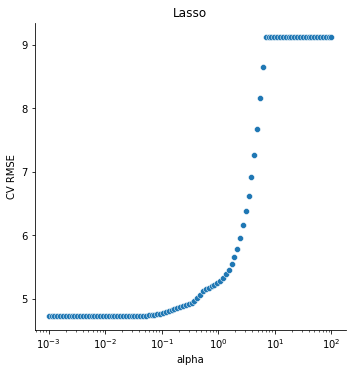

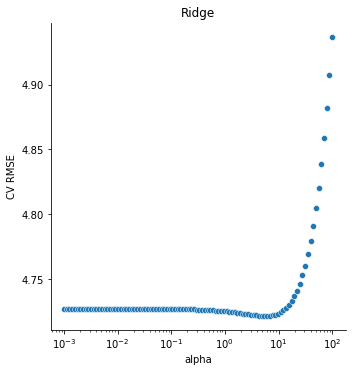

In [35]:
# CV results
cv_res = pd.DataFrame({
  "alpha": alphas,
  "rmse_lasso": -search_lasso.cv_results_["mean_test_score"],
  "rmse_ridge": -search_ridge.cv_results_["mean_test_score"]
  })

sns.relplot(
  data = cv_res,
  x = "alpha",
  y = "rmse_lasso",
  ).set(
    xlabel = "alpha",
    ylabel = "CV RMSE",
    title = "Lasso",
    xscale = "log"
)
sns.relplot(
  data = cv_res,
  x = "alpha",
  y = "rmse_ridge",
  ).set(
    xlabel = "alpha",
    ylabel = "CV RMSE",
    title = "Ridge",
    xscale = "log"
)
plt.show()

From the above plots, we can clearly see how the CV RMSE changes based upon the selected constraint parameter (in this case alpha, but mathematically $\lambda$). For Lasso, the minimum seems to be at low alpha values (although a clear minimum is not present). Whereas for Ridge,we see a clear dip around an alpha of 10.

In [36]:
print('Best CV RMSE (Lasso): ',  -search_lasso.best_score_)
print('Best CV RMSE (Ridge): ',  -search_ridge.best_score_)

Best CV RMSE (Lasso):  4.725006671650144
Best CV RMSE (Ridge):  4.721794901043198


In [37]:
# Finalize model
print("Lasso model: ", search_lasso.best_estimator_)
print("Ridge model: ", search_ridge.best_estimator_)

from sklearn.metrics import mean_squared_error

lasso_rmse_final = mean_squared_error(y_test,
 search_lasso.best_estimator_.predict(X_test), squared = False)
ridge_rmse_final = mean_squared_error(y_test,
 search_ridge.best_estimator_.predict(X_test), squared = False)
print('Test RMSE (Lasso): ', lasso_rmse_final)
print('Test RMSE (Ridge): ', ridge_rmse_final)

Lasso model:  Pipeline(steps=[('std_tf', StandardScaler()),
                ('model', Lasso(alpha=0.016297508346206444, max_iter=10000))])
Ridge model:  Pipeline(steps=[('std_tf', StandardScaler()),
                ('model', Ridge(alpha=5.462277217684343, max_iter=10000))])
Test RMSE (Lasso):  4.8822192249764385
Test RMSE (Ridge):  4.880408916408217


#### Least Squares

In [58]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

OLS = LinearRegression()
pipe_OLS = Pipeline([
    ("std_tf", scalar),
    ("model", OLS)
])

OLS_scores = cross_val_score(
    pipe_OLS,
    X_other,
    y_other,
    scoring = 'neg_root_mean_squared_error',
    cv = 10
)

print('Best CV RMSE (OLS): ',  (-OLS_scores).min())

OLS_rmse_final = mean_squared_error(
    y_test,
    pipe_OLS.fit(X_other, y_other).predict(X_test),
    squared = False)
print('Test RMSE (OLS): ', OLS_rmse_final)

Best CV RMSE (OLS):  3.672945713886665
Test RMSE (OLS):  4.884457866912155


Hence, our final results are

| Method | CV RMSE | Test RMSE |
|:------:|:------:|:------:|:------:|
| LS | 3.673 | 4.885|
| Ridge | 4.722 | 4.880 |
| Lasso | 4.725 | 4.882 |

From these results, it is clear that **least squres had the smallest CV RMSE**, and all models had a similar Test RMSE. However, **Ridge (by a small amount) had the lowest Test RMSE** of all 3 models tested.

### Part (b)

Propose a model (or set of models) that seem to perform well on
this data set, and justify your answer. Make sure that you are
evaluating model performance using validation set error, cross-
validation, or some other reasonable alternative, as opposed to
using training error.

#### Solution

We present the same table from part (a):

| Method | CV RMSE | Test RMSE |
|:------:|:------:|:------:|:------:|
| LS | 3.673 | 4.885|
| Ridge | 4.722 | 4.880 |
| Lasso | 4.725 | 4.882 |

We propose that the **Ridge model**:

$$\sum_{i=1}^n\Biggl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\Biggr) - \lambda\sum_{j=1}^p\beta_j^2$$

as the best model for our data. It has (albeit by a small margin) the lowest Test RMSE; hence, it would be the best model (of those tested) for prediction.

### Part (c)

Does your chosen model involve all of the features in the data
set? Why or why not?

#### Solution

In [70]:
search_ridge.best_estimator_.feature_names_in_

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat'], dtype=object)

We see that our Ridge model takes all of our features into the mode; however, one drawback of Ridge regression is that we cannot easily evalute feature importance. Hence, we do not know to what extent our features affect our response variable. OLS and Lasso allow us to do this, so if the the goal is inference, then we may not want to use Ridge.

So in the broad sense, **yes our model has all of the features**; however, we do not know to what extend they are useful in predicting `medv`.

## ISL Exercise 5.4.2 (10pts)

We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

### Part (a)

What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

#### Solution

The probability the the first bootstrap observation is not the $j$th observation from the original samle is
$$1 - \frac{1}{n}$$
where $n$ is the number of observations. The idea here is that the chance of the first observation being the $j$th observation is $\frac{1}{n}$. So to get the chance that it is *not* the $j$th observation, we take the compliment.

### Part (b)

What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

#### Solution

The probability the the second bootstrap observation is not the $j$th observation from the original samle is
$$1 - \frac{1}{n}$$
This is by independence of the boostrapping process. Since bootstrap performs repeated sampling with replacement, the draws are independent. Hence, the same probability.

### Part (c)

Argue that the probability that the jth observation is not in the
bootstrap sample is $(1-1/n)^n$.

#### Solution

The proof follows from basic probability theory of independence. First, note that the probaility of not chooosing a sample is $1 - \frac{1}{n}$ as shown before. And since the draws are not dependent on each other, the probability of not getting the $j$th observation $n$ times is equal to
$$\prod_{i=1}^n (1 - 1/n)_i = (1 - 1/n) \cdot (1 - 1/n) \cdots (1 - 1/n) = (1 - 1/n)^n$$

### Part (d)

When $n=5$, what is the probability that the jth observation is
in the bootstrap sample?

#### Solution

Considering the probability of the jth observation not being in is $(1-1/n)^n$, the chance of it being in is just the complement
$$ 1 - (1-1/n)^n = 1 - (1-1/5)^5 = 1 - (4/5)^5 \approx 67.2\% $$

### Part (e)

When $n=100$, what is the probability that the jth observation is
in the bootstrap sample?

#### Solution

Same idea as part (d)
$$ 1 - (1-1/n)^n = 1 - (1-1/100)^5 = 1 - (99/100)^{100} \approx 63.4\% $$

### Part (f)

When $n=10,000$, what is the probability that the jth observation is
in the bootstrap sample?

#### Solution

Same idea as part (d)
$$ 1 - (1-1/n)^n = 1 - (1-1/10000)^{10000} \approx 63.2\% $$

### Part (g)

Create a plot that displays, for each integer value of $n$ from 1
to 100,000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.

#### Solution

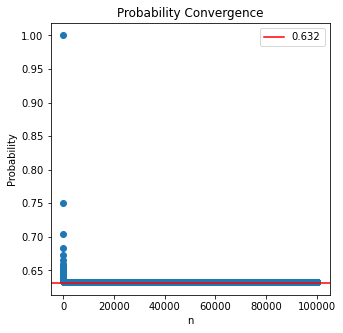

In [102]:
def pr(n):
    p = (1 - (1 - 1/n)**n)
    return p
x = np.linspace(1,100000, 100000)
plt.figure(figsize=(5,5))
plt.scatter(x,pr(x))
plt.xlabel("n")
plt.ylabel("Probability")
plt.title("Probability Convergence")
plt.axhline(0.632, c="red", label="0.632")
plt.legend()
plt.show()

It is clear from the above plot that the probability rapidly converges to about 63.2\%. The plot takes $n$ to 100,000 but it is clear that this is entirely unnecessary. Convergence happens much sooner.

### Part (h)

We will now investigate numerically the probability that a boot-
strap sample of size $n = 100$ contains the jth observation. Here
$j = 4$. We repeatedly create bootstrap samples, and each time
we record whether or not the fourth observation is contained in
the bootstrap sample. (The code below is presented in R)

```
store <- rep(NA, 10000)
for(i in 1:10000){
store[i] <- sum(sample(1:100, rep=TRUE) == 4) > 0
}
mean(store)
```

#### Solution

If we run the code in R in terminal (not shown here), then we get the output:
```
[1] 0.6411
```
The idea here, is that the code is creawting 10,000 samples of numbers from 1 to 100 with replacement. Then it is seeing how many times the number 4 occurs in each sample. If it occurs more than 0 times, then it is put into the `store` variable. Taking the average of the variable reveals that about 60\% of the time, the sample will contain 4.

## ISL Exercise 5.4.9 (20pts)

We will now consider the Boston housing data once again.

### Part (a)

Based on this data set, provide an estiamte for the population mean of `medv`. Call this estimate $\hat{\mu}$.

#### Solution

In [4]:
print("Pop Mean Estimate: ", Boston['medv'].mean())

Pop Mean Estimate:  22.532806324110698


It is clear from the above code that $\hat{\mu} = 22.533$

### Part (b)

Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.

#### Solution

In [7]:
def se_mean(x):
    medv = np.array(x)
    se = np.std(medv) / np.sqrt(len(medv))
    return se
print("Standard Error of mu hat: ", se_mean(Boston['medv']))

Standard Error of mu hat:  0.4084569346972866


We estimate that $\text{SE}(\hat{\mu}) = 0.408$.

### Part (c)

Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

#### Solution

In [29]:
def bootstrap_se(data, n_replicates=1000):
    sample_mean = np.mean(data)
    replicates = np.empty(n_replicates)
    
    for i in range(n_replicates):
        sample = np.random.choice(data, size=len(data), replace=True)
        replicates[i] = np.mean(sample)
    
    return np.std(replicates)

se_pred = bootstrap_se(Boston['medv'])
print('Bootstrap se: ', se_pred)

Bootstrap se:  0.4087345541618287


As seen above, the bootstrap methodology can give a very good estimate of the standard error for the mean. The answer from part (c) is very close to that of part (b).

### Part (d)

Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained using `t.test(Boston$medv)`.

#### Solution

In [36]:
mu_hat = np.mean(Boston['medv'])
CI_low = mu_hat - (2*se_pred)
CI_high = mu_hat + (2*se_pred)

print('The confidence interval is: [', round(CI_low, 4), ',', round(CI_high,4), ']')

The confidence interval is: [ 21.7153 , 23.3503 ]


Running `t.test(Boston$medv)` in R delivers us the result

`95 percent confidence interval:`

`21.73 23.34`

Which is very similar to the results we got by utilizing the classic confidence interval formula.

### Part (e)

Based on this dat set, provide an estimate, $\hat{\mu}_{med}$, for the median value of `medv` in the population.

#### Solution

In [37]:
med_hat = np.median(Boston['medv'])
print('Median: ', med_hat)

Median:  21.2


Thus we find that $\hat{\mu}_{med} = 21.2$.

### Part (f)

We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.

In [50]:
def bootstrap_se_med(data, n_replicates=1000):
    sample_median = np.median(data)
    replicates = np.empty(n_replicates)
    
    for i in range(n_replicates):
        sample = np.random.choice(data, size=len(data), replace=True)
        replicates[i] = np.median(sample)
    
    return np.std(replicates)

se_med = bootstrap_se_med(Boston['medv'])
print('Bootstrap Median se: ', se_med)

Bootstrap Median se:  0.38371791396806043


The standard error for $\hat{\mu}_{med}$ is about 0.38. This value is relatively small in comparison to the median value of 21.2. Hence, there is not too much variation in the median value.

### Part (g)

Based on this data set, provide an estimate for the tenth percentile of `medv` in Bvoston census tracts. Call this quantity $\hat{\mu}_{0.1}$.

#### Solution



In [51]:
percent_10 = np.percentile(Boston['medv'], 10)
print('Tenth Percentile: ', percent_10)

Tenth Percentile:  12.75


Hence, we find that $\hat{\mu}_{0.1} = 12.75$.

### Part (h)

Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

#### Solution

In [58]:
# More concise bootstrap code
quantiles = [Boston['medv'].sample(
    n=len(Boston),
    replace=True).quantile(0.1) for _ in range(1000)]
print('Bootstrap Standard Error:', np.std(quantiles))

Bootstrap Standard Error: 0.5036616895297874


The standard error of $\hat{\mu}_{0.1}$ is about 0.5. Once again, this is relatively small in comparison to our $\hat{\mu}_{0.1}$ value.

## Bonus question (20pts)

Consider a linear regression, fit by least squares to a set of training data $(x_1, y_1), \ldots, (x_N,  y_N)$ drawn at random from a population. Let $\hat \beta$ be the least squares estimate. Suppose we have some test data $(\tilde{x}_1, \tilde{y}_1), \ldots, (\tilde{x}_M, \tilde{y}_M)$ drawn at random from the same population as the training data. If $R_{\text{train}}(\beta) = \frac{1}{N} \sum_{i=1}^N (y_i - \beta^T x_i)^2$ and $R_{\text{test}}(\beta) = \frac{1}{M} \sum_{i=1}^M (\tilde{y}_i - \beta^T \tilde{x}_i)^2$. Show that
$$
\operatorname{E}[R_{\text{train}}(\hat{\beta})] < \operatorname{E}[R_{\text{test}}(\hat{\beta})].
$$

#### Solution

In order to prove this inequality, we would like our choice of $M$ to be arbitrary such that we can set $M=N$. With that, we can then utilize the minimizing nature of our $\hat{\beta}$ to show that the two expectations are, in fact, equal. So we propose the Lemma

*Lemma 1: $\mathbb{E} \left[R_{test} (\hat{\beta}) \right]$ is the same irrespective of our choice of $M$*.

*Proof*:

First consider the expected testing MSE
\begin{align*}
\mathbb{E} \left[R_{test} (\hat{\beta}) \right] &= \mathbb{E} \left[ \frac{1}{M} \sum_{i=1}^{M} (\tilde{y}_i - \hat{\beta}^T \tilde{x}_i)^2    \right] \\
&= \frac{1}{M} \sum_{i=1}^{M} \mathbb{E} \left[ (\tilde{y}_i - \hat{\beta}^T \tilde{x}_i)^2 \right ] \\
\end{align*}
by Linearity of Expectations. Then we can expand the square to get
$$ \frac{1}{M} \sum_{i=1}^{M} \left( \mathbb{E}[\tilde{y}_i^2] + \mathbb{E} \left[(\hat{\beta}^T \tilde{x}_i )^2 \right] - 2 \mathbb{E} \left[\tilde{y}_i \tilde{x}_i^T \hat{\beta} \right]  \right)$$
We know that all the data points $(\tilde{x}_i , \tilde{y}_i)_{i=1}^{M}$ are drawn from the same population. Because of this fact, we can justify dropping the tilde from our variables. Namely, we can replace $\mathbb{E}[\tilde{y}_i^2] \ \forall i = 1,\dots,M$ with $\mathbb{E}[y^2]$. In the same way, we replace $\mathbb{E}[\tilde{x}_i^2]$ and $\mathbb{E}[\tilde{y}\tilde{x}^T]$ with the their non-tilde counterparts.

Furthermore, by Independence and the Law of Iterated Expectations (recall: $\mathbb{E}(X) = \mathbb{E}(\mathbb{E} (X | Y))$) we break apart the expectation of a product into a product of expecations:
$$\mathbb{E}\left[(\hat{\beta}^T \tilde{x}_i)^2 \right] = \mathbb{E}\left[\hat{\beta}^T \right] \mathbb{E}[x^2]$$
and
$$\left[\tilde{y}_i \tilde{x}_i^T \hat{\beta} \right] = \mathbb{E}[xy]^T \mathbb{E}\left[\hat{\beta} \right]$$
We can substitute these expressions back into our previous expression to get
$$ \mathbb{E} \left[R_{test} (\hat{\beta}) \right] = \frac{1}{M} \mathbb{E}[y^2] + \mathbb{E}\left[\hat{\beta}^T \right] \mathbb{E}[x^2] +  \mathbb{E}[xy]^T \mathbb{E}\left[\hat{\beta} \right] $$
Hence, our expected MSE does not depend on our choice of $M$. This concludes the proof of Lemma.

Using Lemma 1, without loss of generality, we can take $M=N$ and re-write our testing MSE as
$$\mathbb{E} \left[R_{test} (\hat{\beta}) \right] = \mathbb{E} \left[ \frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T \tilde{x}_i)^2    \right]$$
We know, from basic properties of linear regression, that $\hat{\beta}$ would not minimize the testing RSS (or SSE); rather, it would be some OLS estimate $\hat{\beta}_{test}$ which we would get by conducting OLS on the testing data. From that, we then say that the MSE using the incorrect $\hat{\beta}$ estimate must be strictly greater than the correct Testing OLS coefficient:
$$\frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T \tilde{x}_i)^2 > \frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T_{test} \tilde{x}_i)^2$$
By basic properites of expectations, we know that the same holds true for their respective expected values
\begin{align*}
\mathbb{E} \left[\frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T \tilde{x}_i)^2 \right] &> \mathbb{E} \left[\frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T_{test} \tilde{x}_i)^2 \right] \\
\mathbb{E} \left[R_{test} (\hat{\beta}) \right] &> \mathbb{E} \left[\frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T_{test} \tilde{x}_i)^2 \right]
\end{align*}
We now turn our attention to the right side of this inequality. Namely, we recall that $(\tilde{x}_i , \tilde{y}_i)_{i=1}^{N}$ is an arbitrary set of points from a larger population, and the OLS testing coefficient associated with it is simply a result of this arbitrary choice of $N$. Hence, we can say that $(\tilde{x}_i , \tilde{y}_i)_{i=1}^{N}$ and $(x_i, y_i)_{i=1}^{N}$ have the same distribution and thus the same expectation. This results in
\begin{align*}
\mathbb{E} \left[\frac{1}{N} \sum_{i=1}^{N} (\tilde{y}_i - \hat{\beta}^T_{test} \tilde{x}_i)^2 \right] &= \mathbb{E} \left[\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{\beta}^T x_i)^2 \right] \\
&= \mathbb{E}\left[R_{\text{train}}(\hat{\beta}) \right]
\end{align*}
Putting the two results back together, we prove the statement
$$\mathbb{E}\left[R_{\text{train}}(\hat{\beta}) \right] < \mathbb{E} \left[R_{test} (\hat{\beta}) \right]$$